<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [3]:
df.shape

(1004966, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


In [5]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [6]:
df.isna().sum()

status                 0
bed               140531
bath              122850
acre_lot          295046
city                  75
state                  0
zip_code             205
house_size        323284
prev_sold_date    499099
price                 71
dtype: int64

In [7]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [20]:
print('status:','\n', df.status.value_counts(),
      '\n','bed values:','\n', df.bed.value_counts(),
      '\n','bath values:','\n', df.bath.value_counts(),
      '\n','state values:', '\n' ,df.state.value_counts(),
      '\n','city values:', '\n' ,df.city.value_counts())

status: 
 for_sale          1003152
ready_to_build       1814
Name: status, dtype: int64 
 bed values: 
 3.0      267108
2.0      186896
4.0      166232
1.0       95250
5.0       67503
6.0       41023
7.0       14103
8.0       11302
9.0        5910
10.0       2999
12.0       2031
11.0       1493
13.0        378
15.0        335
14.0        330
20.0        261
18.0        244
16.0        188
24.0        165
19.0        125
22.0        110
17.0         96
28.0         54
21.0         40
46.0         36
42.0         30
60.0         27
99.0         23
32.0         21
86.0         21
31.0         20
27.0         13
123.0        12
33.0         11
49.0          8
30.0          8
29.0          7
68.0          6
25.0          4
23.0          3
40.0          3
36.0          3
47.0          3
Name: bed, dtype: int64 
 bath values: 
 2.0      303305
1.0      221660
3.0      209379
4.0       80134
5.0       31834
6.0       15930
7.0        7451
8.0        4889
9.0        2785
10.0       1740
12.0  

In [ ]:
df['house_size'].value_counts()

1200.0     5230
800.0      4852
1000.0     4668
1100.0     4354
750.0      4170
           ... 
11033.0       1
5775.0        1
9821.0        1
10440.0       1
5046.0        1
Name: house_size, Length: 6456, dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,864435.0,3.338434,2.082706e+00,1.0,2.00,3.00,4.00,123.0
bath,882116.0,2.513053,1.970696e+00,1.0,1.00,2.00,3.00,198.0
acre_lot,709920.0,15.989320,9.231736e+02,0.0,0.11,0.29,1.16,100000.0
zip_code,1004761.0,6852.214974,3.798489e+03,601.0,3261.00,7052.00,10021.00,99999.0
house_size,681682.0,2167.793055,3.031550e+03,100.0,1127.00,1662.00,2512.00,1450112.0
price,1004895.0,886657.387120,2.731044e+06,0.0,269900.00,479988.00,845000.00,875000000.0


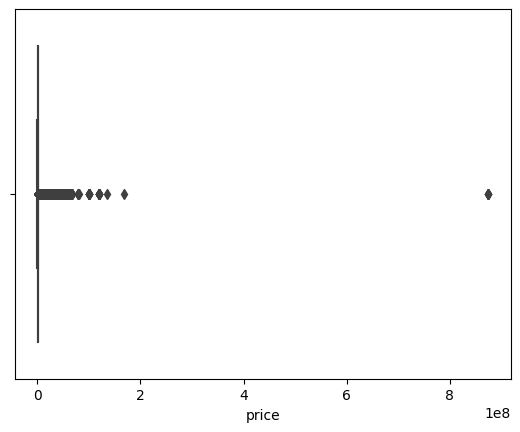

In [30]:
sns.boxplot(data = df , x='price')

In [50]:
df.drop(df[df['price'] >= 200000000 ].index , axis=0 , inplace= True)

<Axes: xlabel='price', ylabel='Count'>

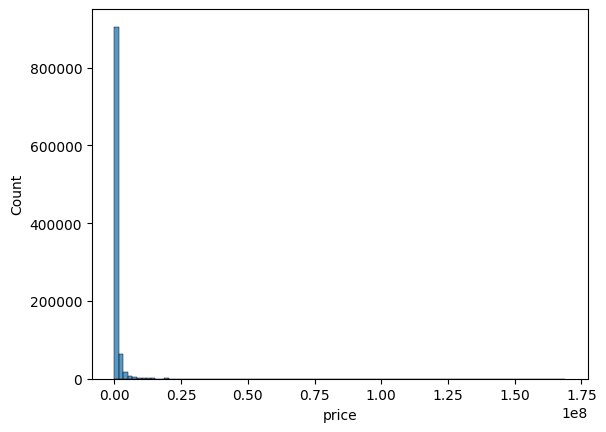

In [53]:
sns.histplot(df['price'] , bins= 100 )

In [56]:
df.dropna(subset=['bed'], inplace= True)

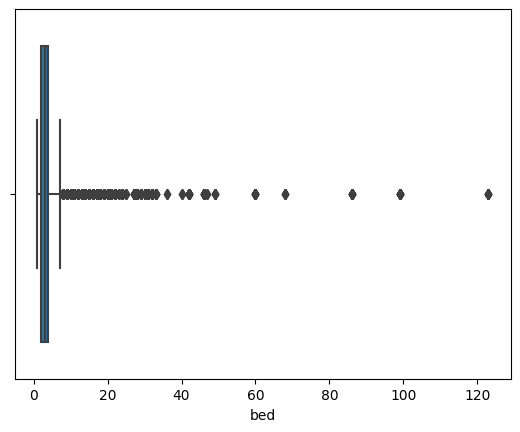

In [57]:
sns.boxplot(data = df , x='bed')


In [58]:
bed_reduced = df[df['bed']< 20]

In [59]:
bed_reduced.shape

(863541, 10)

In [60]:
bed_reduced.isna().sum()

status                 0
bed                    0
bath                5425
acre_lot          272795
city                  24
state                  0
zip_code              99
house_size        202814
prev_sold_date    388710
price                 71
dtype: int64

<Axes: xlabel='price'>

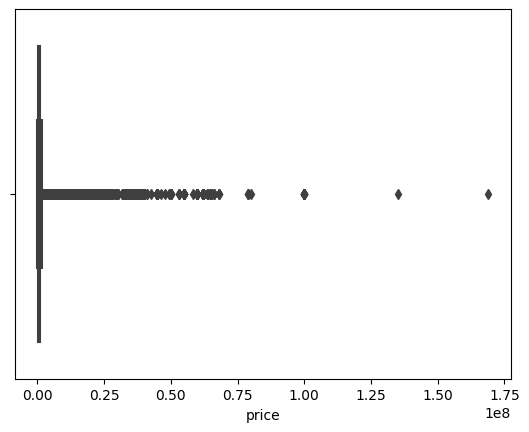

In [61]:
sns.boxplot(data = bed_reduced , x='price')

<Axes: xlabel='house_size'>

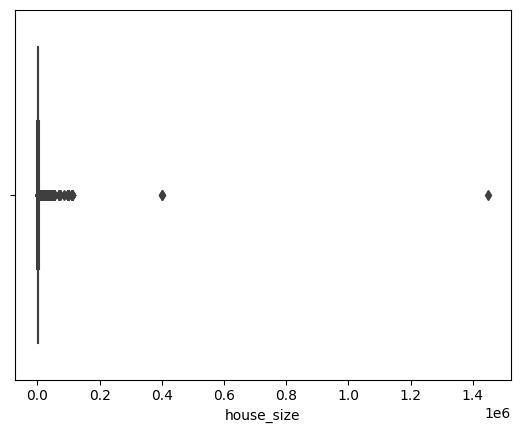

In [64]:
sns.boxplot(data = bed_reduced , x='house_size')

In [71]:
bed_reduced.drop(bed_reduced[(bed_reduced['house_size']> 40000) & (bed_reduced['bed']<10)].index , axis= 0 , inplace=True)

<ipython-input-71-9d448ab4c34c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(bed_reduced[(bed_reduced['house_size']> 40000) & (bed_reduced['bed']<10)].index , axis= 0 , inplace=True)


In [75]:
bed_reduced.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,863375.000000,857950.000000,590608.000000,863276.000000,660561.000000,8.633040e+05
mean,3.309672,2.516734,10.200451,7015.875599,2136.215815,9.494294e+05
std,1.762322,1.480919,691.293358,3790.109489,1937.404459,1.951759e+06
min,1.000000,1.000000,0.000000,601.000000,100.000000,0.000000e+00
25%,2.000000,2.000000,0.110000,3446.000000,1146.000000,3.150000e+05
50%,3.000000,2.000000,0.230000,7106.000000,1670.000000,5.250000e+05
75%,4.000000,3.000000,0.730000,10023.000000,2508.000000,8.900000e+05
max,19.000000,24.000000,100000.000000,95652.000000,39996.000000,1.690000e+08


<Axes: xlabel='price'>

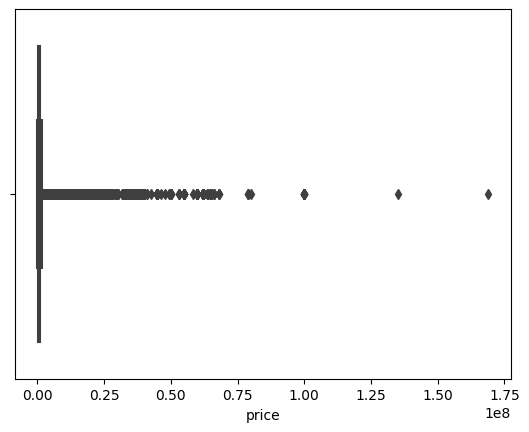

In [76]:
sns.boxplot(data = bed_reduced , x='price')

In [ ]:
df.drop(df[df['price'] >= 75000000 ].index , axis=0 , inplace= True)

In [78]:
bed_reduced[bed_reduced['price'] >= 75000000]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
459320,for_sale,10.0,10.0,60.92,Darien,Connecticut,6820.0,13107.0,NaN,100000000.0
459321,for_sale,10.0,10.0,60.92,Darien,Connecticut,6820.0,13107.0,NaN,100000000.0
463024,for_sale,10.0,10.0,60.92,Darien,Connecticut,6820.0,13107.0,NaN,100000000.0
463025,for_sale,10.0,10.0,60.92,Darien,Connecticut,6820.0,13107.0,NaN,100000000.0
476721,for_sale,1.0,1.0,NaN,New York,New York,10007.0,9680.0,NaN,79000000.0
734849,for_sale,6.0,9.0,0.79,New York City,New York,10022.0,8255.0,NaN,169000000.0
734883,for_sale,5.0,6.0,NaN,New York,New York,10022.0,8055.0,2016-06-07,135000000.0
735041,for_sale,6.0,6.0,NaN,New York City,New York,10022.0,8054.0,NaN,79000000.0
742784,for_sale,1.0,1.0,NaN,New York,New York,10007.0,9680.0,NaN,79000000.0
781485,for_sale,9.0,13.0,NaN,New York,New York,10075.0,15000.0,2012-07-02,80000000.0


In [80]:
bed_reduced.duplicated().sum()

766763

<Axes: xlabel='house_size'>

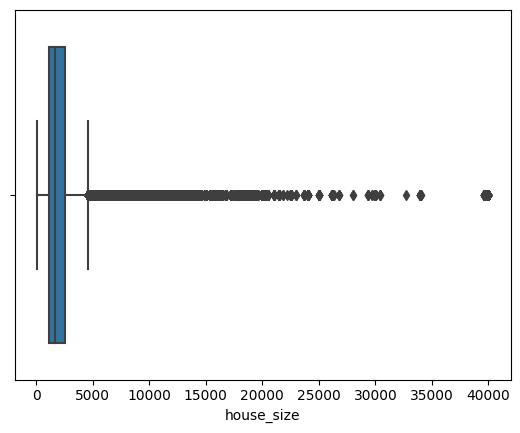

In [77]:
sns.boxplot(data = bed_reduced , x='house_size')

<Axes: xlabel='bed'>

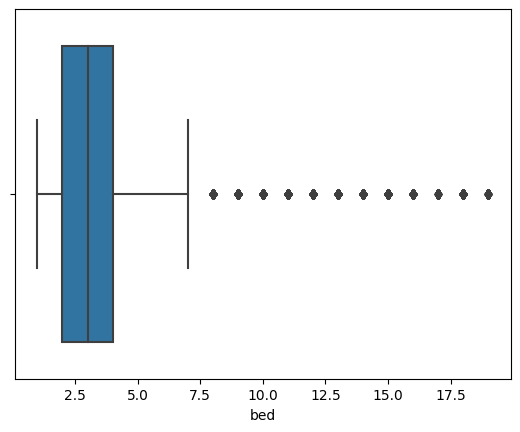

In [74]:
sns.boxplot(data = bed_reduced , x='bed')

In [ ]:
bed_reduced.dropna(subset=['price'], inplace=True)

<ipython-input-10-3317ba81ba68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.dropna(subset=['price'], inplace=True)


In [ ]:
bed_reduced.isna().sum()

status                 0
bed                    0
bath                5354
acre_lot          272729
city                  24
state                  0
zip_code              99
house_size        202814
prev_sold_date    388639
price                  0
dtype: int64

In [ ]:
bed_reduced.drop(columns= ['status','acre_lot', 'zip_code','prev_sold_date'] , inplace=True)

<ipython-input-12-885de7e17e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(columns= ['status','acre_lot', 'zip_code','prev_sold_date'] , inplace=True)


In [ ]:
bed_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863475 entries, 0 to 1004964
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         863475 non-null  float64
 1   bath        858121 non-null  float64
 2   city        863451 non-null  object 
 3   state       863475 non-null  object 
 4   house_size  660661 non-null  float64
 5   price       863475 non-null  float64
dtypes: float64(4), object(2)
memory usage: 46.1+ MB


<Axes: xlabel='bed'>

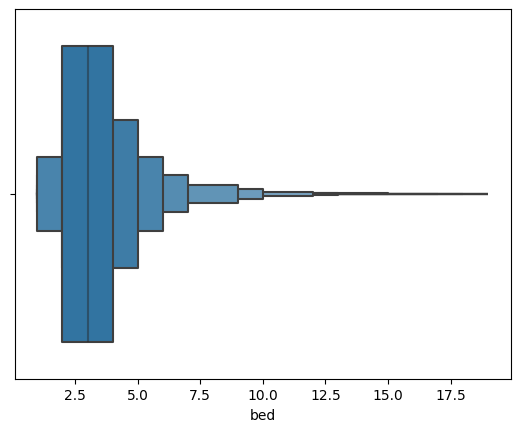

In [ ]:
sns.boxenplot(data = bed_reduced , x= 'bed')

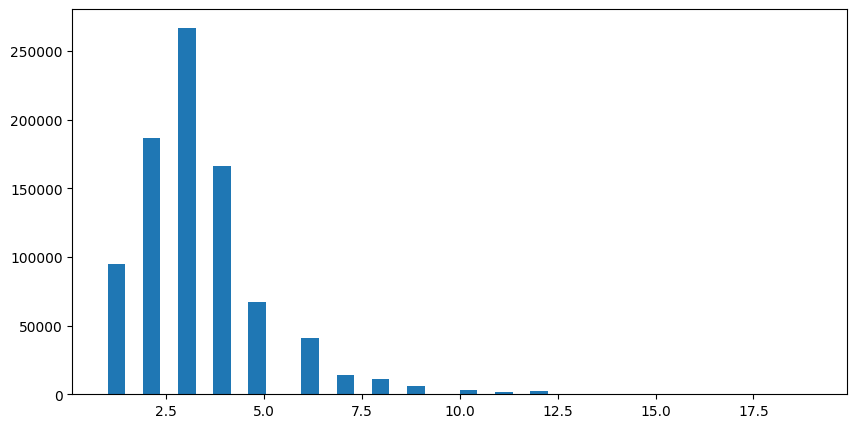

In [ ]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= bed_reduced['bed'], bins=40)
plt.show()

In [ ]:
bed_reduced['bed'].value_counts()

3.0     267074
2.0     186888
4.0     166212
1.0      95250
5.0      67494
6.0      41023
7.0      14103
8.0      11302
9.0       5910
10.0      2999
12.0      2031
11.0      1493
13.0       378
15.0       335
14.0       330
18.0       244
16.0       188
19.0       125
17.0        96
Name: bed, dtype: int64

In [ ]:
bed_reduced.drop(bed_reduced[bed_reduced['house_size']>=1450112].index ,axis= 0 , inplace=True)

<ipython-input-26-36e53204efd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(bed_reduced[bed_reduced['house_size']>=1450112].index ,axis= 0 , inplace=True)


<Axes: xlabel='house_size'>

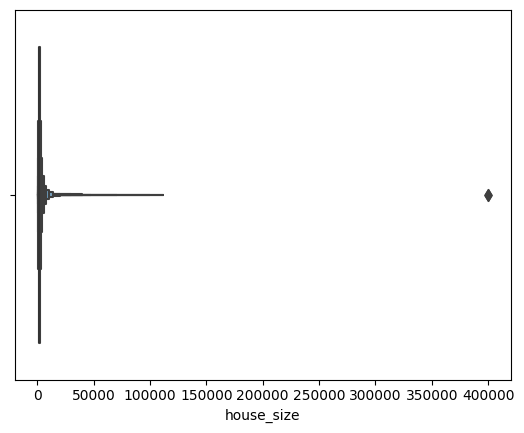

In [ ]:
sns.boxenplot(data = bed_reduced , x= 'house_size')

In [ ]:
bed_reduced['house_size'].max()

400149.0

In [ ]:
bed_reduced.drop(bed_reduced[bed_reduced['house_size']>=400149.0].index ,axis= 0 , inplace=True)

<ipython-input-29-7ddaba4f4540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(bed_reduced[bed_reduced['house_size']>=400149.0].index ,axis= 0 , inplace=True)


<Axes: xlabel='house_size'>

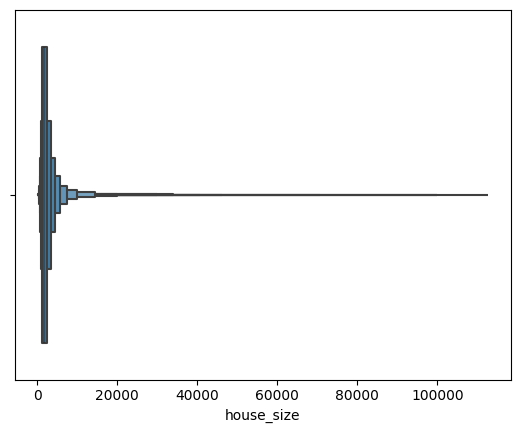

In [ ]:
sns.boxenplot(data = bed_reduced , x= 'house_size')

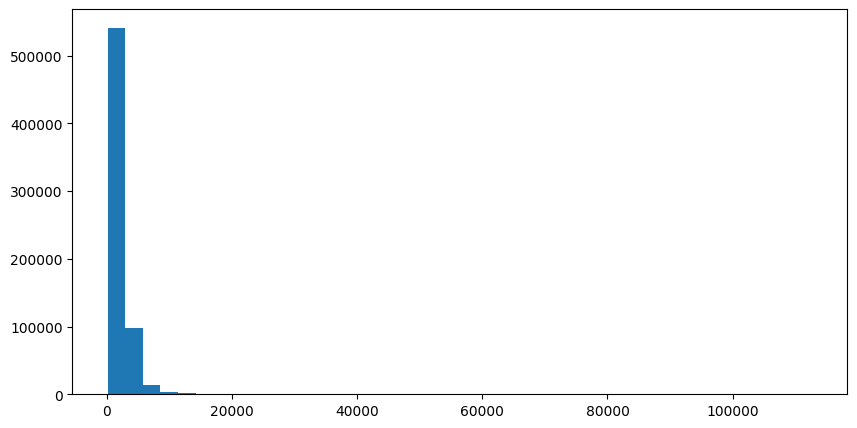

In [ ]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= bed_reduced['house_size'], bins=40)
plt.show()

In [ ]:
house_reduced = bed_reduced[bed_reduced['house_size'] < 15000]

In [ ]:
house_reduced.shape

(658301, 6)

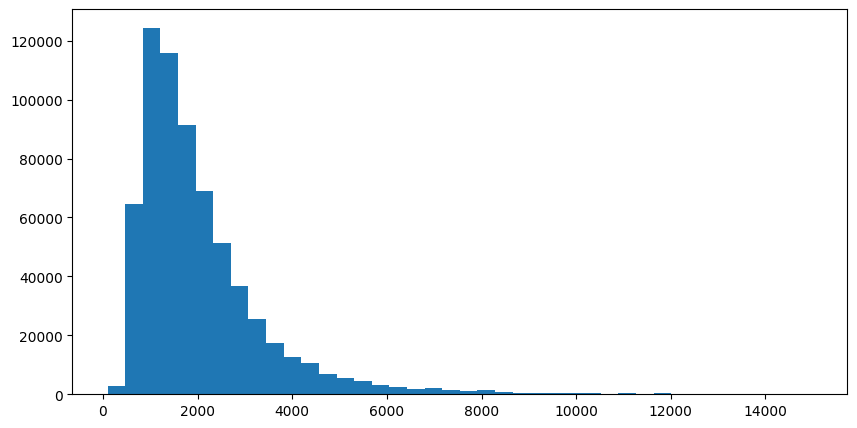

In [ ]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= house_reduced['house_size'], bins=40)
plt.show()

<Axes: xlabel='house_size'>

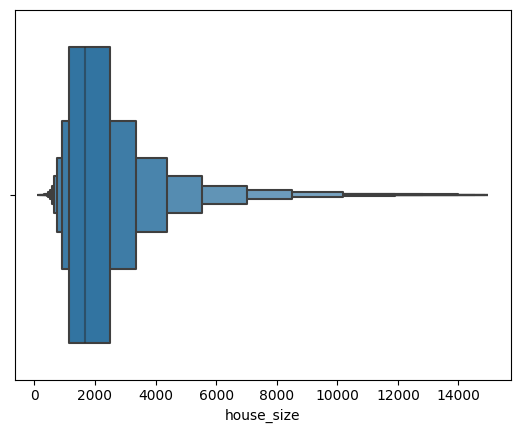

In [ ]:
sns.boxenplot(data = house_reduced , x= 'house_size')

<Axes: xlabel='house_size'>

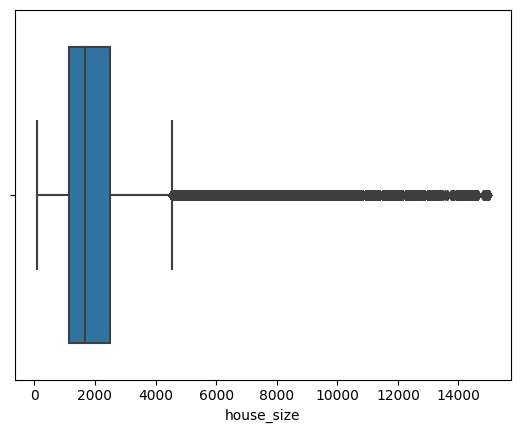

In [ ]:
sns.boxplot(data = house_reduced , x= 'house_size')

In [ ]:
house_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658301 entries, 0 to 1004964
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         658301 non-null  float64
 1   bath        653479 non-null  float64
 2   city        658277 non-null  object 
 3   state       658301 non-null  object 
 4   house_size  658301 non-null  float64
 5   price       658301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 35.2+ MB


In [ ]:
house_reduced.isna().sum()

bed              0
bath          4822
city            24
state            0
house_size       0
price            0
dtype: int64

<Axes: xlabel='bath'>

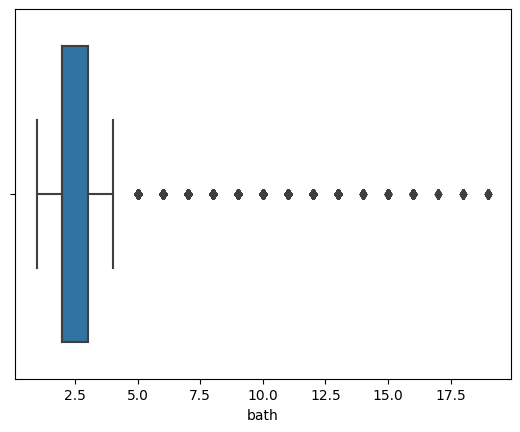

In [ ]:
sns.boxplot(data = house_reduced , x= 'bath')

In [ ]:
house_reduced.head()

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
5,4.0,3.0,San Sebastian,Puerto Rico,2520.0,179000.0


In [ ]:
house_reduced['bath'].mode()

0    2.0
Name: bath, dtype: float64

In [ ]:
house_reduced['city'].mode()

0    Boston
Name: city, dtype: object

In [ ]:
house_reduced['bath'] = house_reduced['bath'].fillna(2)

<ipython-input-19-7b1e9bc74277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_reduced['bath'] = house_reduced['bath'].fillna(2)


In [ ]:
house_reduced['city'] = house_reduced['city'].fillna('Boston')

<ipython-input-20-35444b4a8cd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_reduced['city'] = house_reduced['city'].fillna('Boston')


In [ ]:
house_reduced.isna().sum()

bed           0
bath          0
city          0
state         0
house_size    0
price         0
dtype: int64

In [ ]:
dummy = pd.get_dummies(house_reduced['city'],drop_first=True)

In [ ]:
dummy2 = pd.get_dummies(house_reduced['state'],drop_first=True)

In [ ]:
dummy3 = pd.get_dummies(house_reduced['bath'],drop_first=True)

In [ ]:
dummy4 = pd.get_dummies(house_reduced['bed'],drop_first=True)

In [ ]:
df_df = house_reduced.drop(columns=['city','state','bed','bath'],axis=1)

In [ ]:
final_df = pd.concat([df_df,dummy , dummy2,dummy3,dummy4],axis=1)

In [ ]:
final_df.head()

,house_size,price,Aberdeen,Abington,Absecon,Accord,Acton,Acushnet,Acworth,Adams,...,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
0,920.0,105000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1527.0,80000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,748.0,67000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1800.0,145000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2520.0,179000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df['house_size'] = final_df['house_size'].apply(np.int64)

In [ ]:
X = final_df.drop('price' , axis=1)
y = final_df.price

In [ ]:
X.shape

(658301, 2419)

In [ ]:
y.shape

(658301,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(xtrain,ytrain)

In [ ]:
reg.score(xtest,ytest)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_